# Step 1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns

# Loading the flats data
Ih_df = pd.read_csv("Raw_data/Independent_Houses.csv")

In [2]:
# This will make sure we are getting full view of targetted rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Step 2: Exploratory data analysis

In [3]:
# Shape of the dataframe
Ih_df.shape

(1095, 21)

'property_name', 'Property_Type', 'society', 'price', 'Price_Per_SQFT',
       'Flat_Area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'

In [4]:
# 3 Random rows from dataframe
Ih_df.sample(3)

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
663,5 Bedroom House for sale in Sector 15 Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Sector 15 Part 2 RWA,10 Crore,"₹ 22,222/sq.ft.",(420 sq.m.) Plot Area,Plot area 502(419.74 sq.m.),5 Bedrooms,5 Bathrooms,2 Balconies,NaN,"Sector 15 Gurgaon, Gurgaon, Haryana",2 Floors,East,10+ Year Old,"['Hanuman Mandir', 'State bank of india ATM', ...","Gated community and near market,school and hig...",[],"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4.5 out of 5', 'Lifestyle4 out of...",Z65087414
656,4 Bedroom House for sale in DLF Phase 3,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,2.6 Crore,"₹ 24,074/sq.ft.",(100 sq.m.) Plot Area,Plot area 120(100.34 sq.m.),4 Bedrooms,4 Bathrooms,3+ Balconies,"Study Room,Store Room,Pooja Room","DLF Phase 3, Gurgaon, Haryana",4 Floors,NaN,1 to 5 Year Old,"['Dlf phase 3 metro station', 'Micromax moulsa...",Interested to sell independent house/villa.It ...,"['4 Bed', '7 Wardrobe', '1 Water Purifier', '9...",NaN,"['Environment4 out of 5', 'Lifestyle5 out of 5...",Y61487770
124,5 Bedroom House for sale in Sector 111 Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Puri Diplomatic Greens4.0 ★,NaN,"₹ 12,842/sq.ft.",(650 sq.m.) Built-up Area,NaN,NaN,NaN,NaN,NaN,"Sector 111 Gurgaon, Gurgaon, Haryana",NaN,NaN,NaN,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dr...","Puri diplomatic greens in sector-111 gurgaon, ...",NaN,NaN,NaN,L69894396


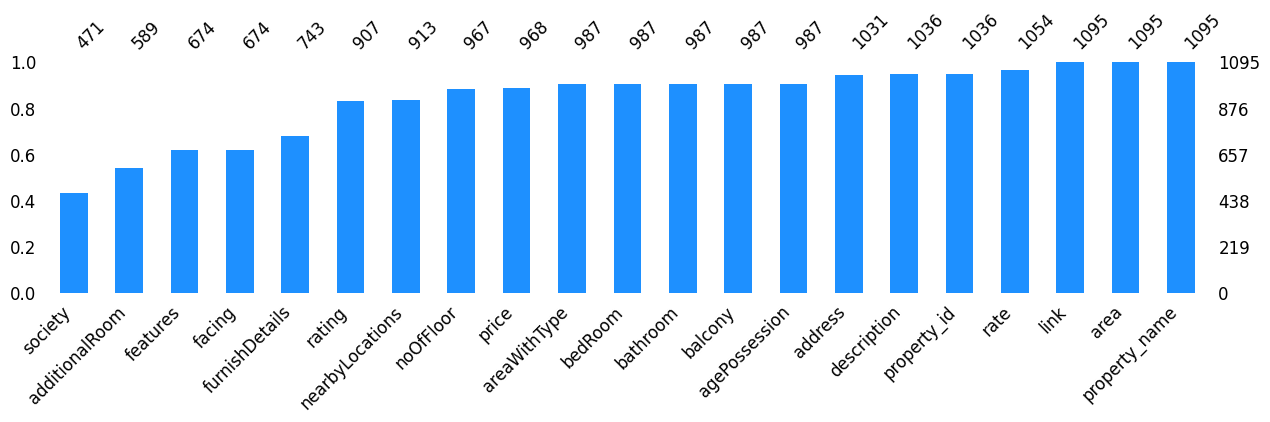

In [5]:
# Visualize missing values using a bar chart
msno.bar(Ih_df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [6]:
# Checking for duplicate values
if Ih_df.duplicated().sum() == 0:
    print("No duplicate values found.")
else:
    print("Duplicate values found. Removing duplicates...")
    Ih_df.drop_duplicates(inplace=True)

Duplicate values found. Removing duplicates...


In [7]:
# Dropping unnecessary columns from dataframe
Ih_df.drop(['property_id','link'],axis=1,inplace=True)

In [8]:
# Let's look at the features information like the data type used and the number of non null count
Ih_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1082 non-null   object
 1   society          463 non-null    object
 2   price            955 non-null    object
 3   rate             1041 non-null   object
 4   area             1082 non-null   object
 5   areaWithType     974 non-null    object
 6   bedRoom          974 non-null    object
 7   bathroom         974 non-null    object
 8   balcony          974 non-null    object
 9   additionalRoom   578 non-null    object
 10  address          1018 non-null   object
 11  noOfFloor        955 non-null    object
 12  facing           662 non-null    object
 13  agePossession    974 non-null    object
 14  nearbyLocations  900 non-null    object
 15  description      1023 non-null   object
 16  furnishDetails   732 non-null    object
 17  features         662 non-null    

### ▶️  Handling society feature
Given the potential for the same society name to appear in both upper and lower case, we aim to mitigate such inconsistencies by converting all society names to lowercase. Additionally, we will replace any 'NaN' values with the term 'independent'. This substitution serves to signify that in cases where a house isn't associated with a specific society, it can be considered independent from any societal affiliation.

In [9]:
# Removing any rating and lowercasing the society names to reduce the dimensionality 
Ih_df['society'] = Ih_df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()
Ih_df['society'] = Ih_df['society'].str.replace('nan','independent')

### ▶️ Removing irrelevent rows from price feature
By closely observing the `price` feature we will see that there is a particular record with price = 'Price on Request' so we will remove it from the dataframe.

In [10]:
# Remove rows with 'Price on Request'
Ih_df = Ih_df[Ih_df['price'] != 'Price on Request']

# Reset the indexes
Ih_df.reset_index(drop=True, inplace=True)

### ▶️ Standardizing the price from Lakhs to Crore

In [11]:
# Converting Lac to Crore
for i in range(len(Ih_df)):
    try:
        item = Ih_df.loc[i, 'price']

        # Check if the value is null
        if pd.isnull(item):
            Ih_df.loc[i, 'price'] = np.nan
        else:
            # Check if the value is in Lac format
            if item.split()[1] == 'Lac':
                Ih_df.loc[i, 'price'] = round(float(float(item.split()[0])/100), 2)
            else:
                Ih_df.loc[i, 'price'] = round(float(item.split()[0]), 2)
    except Exception as e:
        print(e)
        print("Index: ", i)

In [12]:
print("Total sum of mising values : ",Ih_df['price'].isnull().sum())
print("Total percentage of mising values : ",np.round(Ih_df['price'].isnull().mean()*100,2))

Total sum of mising values :  127
Total percentage of mising values :  11.85


### ▶️ Removing price characters from rate feature 

In [14]:
# Imputing the missing values with '₹ 0/sq.ft.'
Ih_df['rate'] = Ih_df['rate'].fillna('₹ 0/sq.ft.')

# Extracting numeric values and converting to floats
Ih_df['Price_Per_SQFT'] = Ih_df['rate'].apply(lambda x: float(x.split()[1].split('/')[0].replace(",", "")))

# Renaming the column
Ih_df.drop(columns=['rate'], inplace=True)  # Drop the original 'rate' column

In [18]:
# Replacing all 0~Null values with the median value as the feature is skewed
Ih_df['Price_Per_SQFT'] = Ih_df['Price_Per_SQFT'].replace(0, Ih_df['Price_Per_SQFT'].median())

### ▶️ Removing tuples where all values in bedroom,bathroom and balcony are missing

In [21]:
# All the rows where all the 3 feature values are missing
Indexes = Ih_df[(Ih_df['bedRoom'].isna()) & (Ih_df['bathroom'].isna()) & (Ih_df['balcony'].isna())].index
print("Indexes will all feature values missing are : ",Indexes)

Indexes will all feature values missing are :  Int64Index([  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
            ...
             364,  365,  367,  368,  369,  871, 1068, 1069, 1070, 1071],
           dtype='int64', length=108)


Since for the above rows all other feature values are also missing so the best approach would be to simply ignore all these rows from the dataset.

In [22]:
Ih_df.drop(Indexes,inplace=True,axis=0)

# Resetting the indexes
Ih_df.reset_index(drop=True,inplace=True)

### ▶️ Cleaning and processing the balcony,bathroom and bedRoom 

In [17]:
for feature in ['bedRoom', 'bathroom', 'balcony']:
    """
    In the balcony feature, we have 'No balcony' and '3+ balcony' values, so we need to consider this feature as categorical rather than numerical.
    """
    if feature == 'balcony':
        for i in range(len(Ih_df)):
            try:
                item = Ih_df[feature].iloc[i]
                item = item.split()[0]
                if item == 'No':
                    Ih_df.loc[i, feature] = 0
                else:
                    Ih_df.loc[i, feature] = item
            except Exception as e:
                print(e)
                print("Index giving error:", i)
    else:
        for i in range(len(Ih_df)):
            try:
                item = Ih_df[feature].iloc[i]
                Ih_df.loc[i, feature] = float(item.split()[0])
            except Exception as e:
                print(e)
                print("Index giving error:", i)

### ▶️ Standardizing the additionalRoom feature

In [23]:
# Replacing the values and lowercasing values to remove any random dimensionality due to Upper casing and lower casing
Ih_df['additionalRoom'].fillna('Not available',inplace=True)
Ih_df['additionalRoom'] = Ih_df['additionalRoom'].str.lower()

In [24]:
Ih_df.rename(columns={'noOfFloor':'floorNum'},inplace=True)

# Imputing missing values mode value
Ih_df['floorNum'] = Ih_df['floorNum'].fillna(Ih_df['floorNum'].mode()[0])
Ih_df['floorNum'] = Ih_df['floorNum'].str.split(' ').str.get(0)

In [25]:
# Filling missing values in the face feature with NA
Ih_df['facing'].fillna('NA',inplace=True)

In [27]:
# Renaming feature name
Ih_df.rename(columns={'area': 'Area'}, inplace=True)

area = []
for i in range(len(Ih_df)):
    if pd.isna(Ih_df['price'].iloc[i]) or pd.isna(Ih_df['Price_Per_SQFT'].iloc[i]):
        area.append(np.nan)
    else:
        price_value = float(Ih_df['price'].iloc[i]) * 10000000
        price_psqft = float(Ih_df['Price_Per_SQFT'].iloc[i])
        area.append(price_value / price_psqft)

Ih_df['Area'] = area

In [28]:
# Adding new feature for property type
Ih_df.insert(loc=1,column='Property_Type',value = 'Independent_house')

In [32]:
Ih_df.to_csv('Cleaned_datasets/Cleaned_IH_V1.csv',index=False)